In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/corona_tested_individuals_ver_008.csv", low_memory=False)

In [4]:
data.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [5]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


In [7]:
data.shape

(2742596, 10)

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data Cleaning

In [9]:
data = data.drop('test_date', axis=1)
data = data.drop('age_60_and_above', axis=1)
data = data.drop('gender', axis=1)
data = data.drop('test_indication', axis=1)

In [10]:
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result
0,0,0,0,0,0,negative
1,0,1,0,0,0,negative
2,0,0,0,0,0,negative
3,0,0,0,0,0,negative
4,0,1,0,0,0,negative


In [11]:
data.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
dtype: int64

In [12]:
 data.dropna(inplace=True) 
 data.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
dtype: int64

In [13]:
data.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,2.742596e+06,2.742596e+06,2.742596e+06,2.742596e+06,2.742596e+06
mean,4.059584e-02,3.536649e-02,1.096917e-02,4.016997e-03,2.185557e-02
std,1.973521e-01,1.847044e-01,1.041578e-01,6.325237e-02,1.462119e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
y = data['corona_result']
X = data.drop('corona_result', axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
 random_state=0)

# **LightGBM**

[10]	training's multi_logloss: 0.307207	valid_0's multi_logloss: 0.307081
[20]	training's multi_logloss: 0.302997	valid_0's multi_logloss: 0.302926
[30]	training's multi_logloss: 0.302356	valid_0's multi_logloss: 0.302308
[40]	training's multi_logloss: 0.302244	valid_0's multi_logloss: 0.302205
[50]	training's multi_logloss: 0.30222	valid_0's multi_logloss: 0.302184
[60]	training's multi_logloss: 0.302214	valid_0's multi_logloss: 0.302179
[70]	training's multi_logloss: 0.302212	valid_0's multi_logloss: 0.302177
[80]	training's multi_logloss: 0.302211	valid_0's multi_logloss: 0.302177
[90]	training's multi_logloss: 0.302211	valid_0's multi_logloss: 0.302176
[100]	training's multi_logloss: 0.302211	valid_0's multi_logloss: 0.302176
CPU times: user 2min, sys: 191 ms, total: 2min 1s
Wall time: 1min 6s


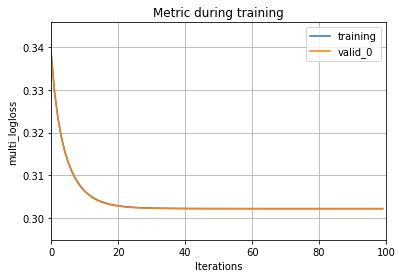

In [16]:
%%time
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(objective='binary', random_state=5)
lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)], verbose=10)
lgb.plot_metric(lgbm)

In [17]:
y_pred = lgbm.predict(X_test)
y_pred

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred))

0.9166794282797346


In [19]:
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.93      0.98      0.96    496209
       other       0.00      0.00      0.00      8342
    positive       0.63      0.34      0.44     43969

    accuracy                           0.92    548520
   macro avg       0.52      0.44      0.47    548520
weighted avg       0.89      0.92      0.90    548520



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


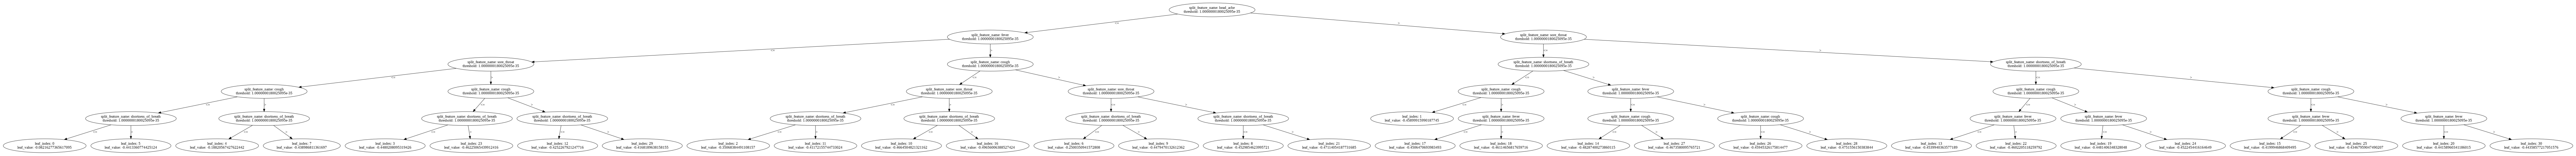

In [20]:
lgb.plot_tree(lgbm,figsize = (150,150),tree_index=0)

#**XGBoost**



In [21]:
import xgboost as xgb
xgbm = xgb.XGBClassifier()
xgbm.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)], verbose=10)

[0]	validation_0-merror:0.084372	validation_1-merror:0.084308
[10]	validation_0-merror:0.084881	validation_1-merror:0.084877
[20]	validation_0-merror:0.084881	validation_1-merror:0.084877
[30]	validation_0-merror:0.084994	validation_1-merror:0.085155
[40]	validation_0-merror:0.083971	validation_1-merror:0.084098
[50]	validation_0-merror:0.083971	validation_1-merror:0.084098
[60]	validation_0-merror:0.083971	validation_1-merror:0.084098
[70]	validation_0-merror:0.083703	validation_1-merror:0.083872
[80]	validation_0-merror:0.083321	validation_1-merror:0.083369
[90]	validation_0-merror:0.083321	validation_1-merror:0.083369
[99]	validation_0-merror:0.083321	validation_1-merror:0.083369


XGBClassifier(objective='multi:softprob')

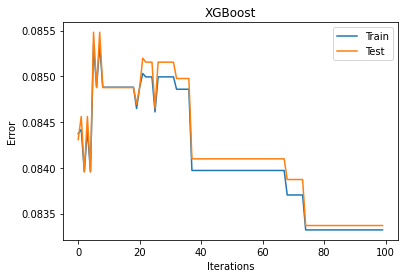

In [22]:
results = xgbm.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.title('XGBoost')
plt.show()

In [23]:
y_pred = lgbm.predict(X_test)
y_pred

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred))

0.9166794282797346


In [25]:
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.93      0.98      0.96    496209
       other       0.00      0.00      0.00      8342
    positive       0.63      0.34      0.44     43969

    accuracy                           0.92    548520
   macro avg       0.52      0.44      0.47    548520
weighted avg       0.89      0.92      0.90    548520



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


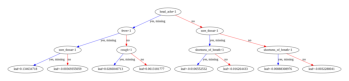

<Figure size 7200x3600 with 0 Axes>

In [26]:
from xgboost import plot_tree
plot_tree(xgbm)
fig = plt.figure()
fig.set_figheight(50)
fig.set_figwidth(100)
plt.show()